# 이휘

In [25]:
import pandas as pd
import numpy as np
# 차트
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# 차트 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [27]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [28]:
# 날짜, 요일, 홈팀, 원정팀, 장소, 관중 수 데이터 불러오기
data_01 = pd.read_csv("./Data/kiwoom_heroes_info(2022~2024).csv")
data_01.head()

,날짜,요일,홈팀,원정팀,장소,관중 수
0,2022-04-02,토,키움,롯데,고척,8257
1,2022-04-03,일,키움,롯데,고척,6115
2,2022-04-05,화,키움,LG,고척,2298
3,2022-04-06,수,키움,LG,고척,2304
4,2022-04-07,목,키움,LG,고척,2055


In [29]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      173 non-null    object
 1   요일      173 non-null    object
 2   홈팀      173 non-null    object
 3   원정팀     173 non-null    object
 4   장소      173 non-null    object
 5   관중 수    173 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 8.2+ KB


> 날짜는 datetime으로 타입 변환

In [30]:
# 날짜 데이터를 datetime으로 type으로 변환할 수 있게 정규식 사용하여 데이터 변환
data_01['날짜'] = data_01['날짜'].str.replace(r'\([가-힣]\)', '', regex=True)
# 날짜 컬럼을 datetime으로 type 변환
data_01['날짜'] = pd.to_datetime(data_01['날짜'])
data_01.head()

,날짜,요일,홈팀,원정팀,장소,관중 수
0,2022-04-02,토,키움,롯데,고척,8257
1,2022-04-03,일,키움,롯데,고척,6115
2,2022-04-05,화,키움,LG,고척,2298
3,2022-04-06,수,키움,LG,고척,2304
4,2022-04-07,목,키움,LG,고척,2055


In [31]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      173 non-null    datetime64[ns]
 1   요일      173 non-null    object        
 2   홈팀      173 non-null    object        
 3   원정팀     173 non-null    object        
 4   장소      173 non-null    object        
 5   관중 수    173 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 8.2+ KB


In [32]:
data_01

,날짜,요일,홈팀,원정팀,장소,관중 수
0,2022-04-02,토,키움,롯데,고척,8257
1,2022-04-03,일,키움,롯데,고척,6115
2,2022-04-05,화,키움,LG,고척,2298
3,2022-04-06,수,키움,LG,고척,2304
4,2022-04-07,목,키움,LG,고척,2055
...,...,...,...,...,...,...
168,2024-05-22,수,키움,NC,고척,4337
169,2024-05-23,목,키움,NC,고척,3897
170,2024-05-31,금,키움,SSG,고척,5680
171,2024-06-01,토,키움,SSG,고척,10462


In [33]:
# 날짜, 요일, 홈팀, 원정팀, 장소, 관중 수 데이터 불러오기
data_02 = pd.read_csv("./Data/test.csv")
data_02.head()

,관중 수,요일,원정팀,시작시간
0,8257,토,롯데,14:00
1,6115,일,롯데,14:00
2,2298,화,LG,18:30
3,2304,수,LG,18:30
4,2055,목,LG,18:30


In [34]:
# 병합하기
kiwoom = pd.concat([data_01['날짜'],data_01['요일'],data_01['원정팀'],data_01['관중 수'],data_02['시작시간'],],axis=1)
kiwoom

,날짜,요일,원정팀,관중 수,시작시간
0,2022-04-02,토,롯데,8257,14:00
1,2022-04-03,일,롯데,6115,14:00
2,2022-04-05,화,LG,2298,18:30
3,2022-04-06,수,LG,2304,18:30
4,2022-04-07,목,LG,2055,18:30
...,...,...,...,...,...
168,2024-05-22,수,NC,4337,18:30
169,2024-05-23,목,NC,3897,18:30
170,2024-05-31,금,SSG,5680,18:30
171,2024-06-01,토,SSG,10462,17:00


In [35]:
kiwoom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      173 non-null    datetime64[ns]
 1   요일      173 non-null    object        
 2   원정팀     173 non-null    object        
 3   관중 수    173 non-null    int64         
 4   시작시간    173 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 6.9+ KB


In [37]:
kiwoom['연도'] = kiwoom['날짜'].dt.year
kiwoom['월'] = kiwoom['날짜'].dt.month
kiwoom

,날짜,요일,원정팀,관중 수,시작시간,연도,월
0,2022-04-02,토,롯데,8257,14:00,2022,4
1,2022-04-03,일,롯데,6115,14:00,2022,4
2,2022-04-05,화,LG,2298,18:30,2022,4
3,2022-04-06,수,LG,2304,18:30,2022,4
4,2022-04-07,목,LG,2055,18:30,2022,4
...,...,...,...,...,...,...,...
168,2024-05-22,수,NC,4337,18:30,2024,5
169,2024-05-23,목,NC,3897,18:30,2024,5
170,2024-05-31,금,SSG,5680,18:30,2024,5
171,2024-06-01,토,SSG,10462,17:00,2024,6


In [38]:
# '요일' 열을 One-Hot Encoding으로 변환.
day_of_week_encoding = pd.get_dummies(kiwoom['요일'], drop_first=True)
kiwoom = kiwoom.join(day_of_week_encoding)
# '원정팀' 열을 One-Hot Encoding으로 변환.
away_encoding = pd.get_dummies(kiwoom['원정팀'], drop_first=True)
kiwoom = kiwoom.join(away_encoding)
# '시작시간' 열을 One-Hot Encoding으로 변환.
start_time_encoding = pd.get_dummies(kiwoom['시작시간'], drop_first=True)
kiwoom = kiwoom.join(start_time_encoding)
# '연도' 열을 One-Hot Encoding으로 변환.
year_encoding = pd.get_dummies(kiwoom['연도'], drop_first=True)
kiwoom = kiwoom.join(year_encoding)
# '연도' 열을 One-Hot Encoding으로 변환.
month_encoding = pd.get_dummies(kiwoom['월'], drop_first=True)
kiwoom = kiwoom.join(month_encoding)

In [41]:
kiwoom.iloc[:,7:] = kiwoom.iloc[:,7:].astype('int')
kiwoom

,날짜,요일,원정팀,관중 수,시작시간,연도,월,목,수,일,...,18:30,2023,2024,4,5,6,7,8,9,10
0,2022-04-02,토,롯데,8257,14:00,2022,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2022-04-03,일,롯데,6115,14:00,2022,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2022-04-05,화,LG,2298,18:30,2022,4,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,2022-04-06,수,LG,2304,18:30,2022,4,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,2022-04-07,목,LG,2055,18:30,2022,4,1,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2024-05-22,수,NC,4337,18:30,2024,5,0,1,0,...,1,0,1,0,1,0,0,0,0,0
169,2024-05-23,목,NC,3897,18:30,2024,5,1,0,0,...,1,0,1,0,1,0,0,0,0,0
170,2024-05-31,금,SSG,5680,18:30,2024,5,0,0,0,...,1,0,1,0,1,0,0,0,0,0
171,2024-06-01,토,SSG,10462,17:00,2024,6,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [42]:
kiwoom_new = pd.concat([kiwoom['관중 수'],kiwoom.iloc[:,7:]],axis=1)
kiwoom_new

,관중 수,목,수,일,토,화,KT,LG,NC,SSG,...,18:30,2023,2024,4,5,6,7,8,9,10
0,8257,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,6115,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2298,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,2304,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,2055,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,4337,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
169,3897,1,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
170,5680,0,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
171,10462,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [45]:
kiwoom_new.corr()

,관중 수,목,수,일,토,화,KT,LG,NC,SSG,...,18:30,2023,2024,4,5,6,7,8,9,10
관중 수,1.000000,-0.232173,-0.197375,0.193661,0.364412,-0.155649,-0.344441,0.018838,-0.286092,0.129980,...,-0.524264,0.252373,0.313573,0.038029,-0.014576,-0.056517,-0.033572,0.012552,-0.055364,0.155518
목,-0.232173,1.000000,-0.192985,-0.201389,-0.213788,-0.192985,0.031331,0.049804,0.049804,-0.072035,...,0.325014,0.034550,-0.042054,-0.001460,-0.060332,0.071087,-0.038992,0.022734,0.052165,-0.048533
수,-0.197375,-0.192985,1.000000,-0.192985,-0.204866,-0.184932,0.043765,0.009951,0.009951,-0.111072,...,0.309197,-0.002620,-0.028694,0.016534,-0.046631,0.086564,-0.027659,0.132780,-0.121482,-0.046507
일,0.193661,-0.201389,-0.192985,1.000000,-0.213788,-0.192985,-0.017064,-0.051562,-0.000879,0.117502,...,-0.564460,-0.028367,0.039692,-0.001460,0.057827,-0.058822,0.052165,-0.072035,0.006586,-0.048533
토,0.364412,-0.213788,-0.204866,-0.213788,1.000000,-0.204866,-0.032564,-0.016065,-0.016065,0.096442,...,-0.599213,-0.004024,0.017729,0.008028,-0.003942,-0.075373,0.032696,-0.085902,0.076544,0.087746
화,-0.155649,-0.192985,-0.184932,-0.192985,-0.204866,1.000000,0.043765,0.009951,0.009951,-0.111072,...,0.309197,0.029758,-0.028694,0.016534,-0.006092,0.041994,-0.027659,0.084009,-0.121482,0.102489
KT,-0.344441,0.031331,0.043765,-0.017064,-0.032564,0.043765,1.000000,-0.123208,-0.123208,-0.134387,...,0.064782,0.029103,-0.022356,0.132580,-0.129523,-0.000292,0.018159,-0.134387,0.124648,-0.039101
LG,0.018838,0.049804,0.009951,-0.051562,-0.016065,0.009951,-0.123208,1.000000,-0.116129,-0.126665,...,-0.001123,-0.014905,-0.006070,0.071976,-0.165449,0.174553,-0.133441,-0.126665,-0.021918,0.140251
NC,-0.286092,0.049804,0.009951,-0.000879,-0.016065,0.009951,-0.123208,-0.116129,1.000000,-0.126665,...,0.037741,-0.014905,-0.006070,-0.060490,0.123669,-0.143317,0.201128,-0.126665,0.033844,-0.036854
SSG,0.129980,-0.072035,-0.111072,0.117502,0.096442,-0.111072,-0.134387,-0.126665,-0.126665,1.000000,...,-0.213179,-0.058237,0.110255,-0.210464,0.270039,-0.007730,-0.041284,0.132832,-0.093416,-0.040198


In [49]:
kiwoom_new.columns = kiwoom_new.columns.astype(str)
kiwoom_new

,관중 수,목,수,일,토,화,KT,LG,NC,SSG,...,18:30,2023,2024,4,5,6,7,8,9,10
0,8257,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,6115,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2298,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,2304,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,2055,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,4337,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
169,3897,1,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
170,5680,0,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
171,10462,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 데이터 준비 (x는 피쳐, y는 타겟)
x = kiwoom_new.drop('관중 수', axis=1)
y = kiwoom_new['관중 수']

# 학습 데이터와 테스트 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 랜덤 포레스트 회귀모델 학습
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_regressor.predict(x_test)

# 오차 계산 (평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

# MAPE 계산 함수 정의
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    print(y_pred)
    print(y_true)
    # return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return (1 - np.mean(np.abs((y_true - y_pred) / y_true))) * 100


# MAPE 계산
mape = mean_absolute_percentage_error(y_test, y_pred)
print("정확도율:", mape.round(0), "%")

[ 8091.75        6626.92        3879.44        5321.39
  4555.84916667  3944.66        6029.25083333  6557.54
  4574.61        4912.01666667  6774.58       12412.97
 14003.37       11119.62        7859.21        4094.88
  5667.19        5119.9         6391.84        3848.61
  5879.19       10428.66        4287.15       11235.72
 10537.66        4140.87        3244.06        6672.31
  6859.96        6330.14333333  3917.16        5166.82
  3280.65        9553.19        4232.53      ]
[11324 11692  2877  5827  5407  2489  8175  6455  3238  4710  4075 11562
 15073 12133 11650  2062  5742  3869  6897  3024  5662 11235  4027 10028
 10462  3156  2055  8528  8016  7573  2349  3213  2649  6573  5178]
정확도율: 73.0 %


In [46]:
# 2022년과 2023년 홈 경기 데이터만 추출합니다.
kiwoom_2022_2023 = kiwoom[(kiwoom['연도'] == 2022) | (kiwoom['연도'] == 2023)]
kiwoom_2022_2023.head()

,날짜,요일,원정팀,관중 수,시작시간,연도,월,목,수,일,...,18:30,2023,2024,4,5,6,7,8,9,10
0,2022-04-02,토,롯데,8257,14:00,2022,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2022-04-03,일,롯데,6115,14:00,2022,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2022-04-05,화,LG,2298,18:30,2022,4,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,2022-04-06,수,LG,2304,18:30,2022,4,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,2022-04-07,목,LG,2055,18:30,2022,4,1,0,0,...,1,0,0,1,0,0,0,0,0,0


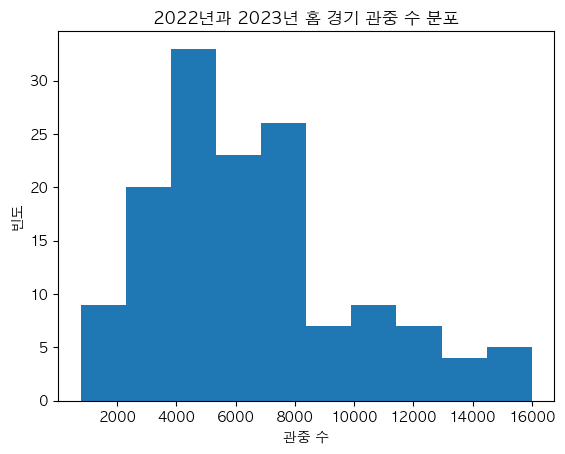

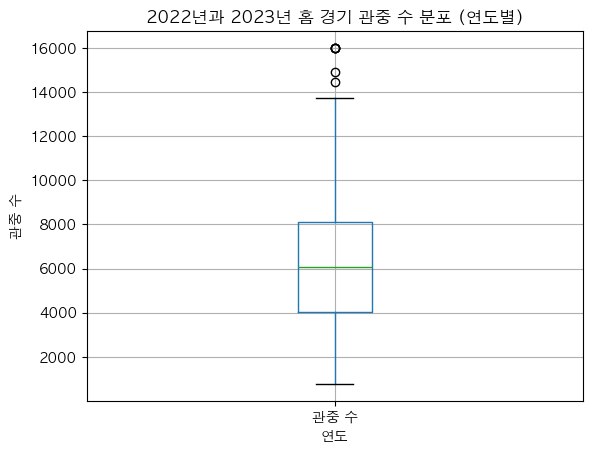

In [47]:
# '관중 수' 변수의 분포를 히스토그램으로 시각화합니다.
plt.hist(kiwoom_2022_2023['관중 수'])
plt.xlabel('관중 수')
plt.ylabel('빈도')
plt.title('2022년과 2023년 홈 경기 관중 수 분포')
plt.show()

# '관중 수' 변수의 분포를 박스 플롯으로 시각화합니다.
kiwoom_2022_2023.boxplot(column='관중 수')
plt.xlabel('연도')
plt.ylabel('관중 수')
plt.title('2022년과 2023년 홈 경기 관중 수 분포 (연도별)')
plt.show()

In [ ]:
# '관중 수' 변수의 기본 통계량을 계산합니다.
kiwoom_2022_2023['관중 수'].describe()

In [ ]:
# 원정 팀별 평균 관중 수를 계산하고, '원정 팀' 열을 인덱스로 설정합니다.
avg_attendance_by_opponent = kiwoom_2022_2023.groupby('요일')['관중 수'].mean()
print(avg_attendance_by_opponent)

# 상위 10개 원정 팀별 평균 관중 수를 그래프로 시각화합니다.
avg_attendance_by_opponent.nlargest(10).plot(kind='bar')
plt.xlabel('요일')
plt.ylabel('평균 관중 수')
plt.title('요일별 평균 관중 수')
plt.xticks(rotation=45)  # 원정 팀 이름이 겹치지 않도록 회전
plt.show()

In [ ]:
# 원정 팀별 평균 관중 수를 계산하고, '원정 팀' 열을 인덱스로 설정합니다.
avg_attendance_by_opponent = kiwoom_2022_2023.groupby('원정팀')['관중 수'].mean().round()
print(avg_attendance_by_opponent)

# 상위 10개 원정 팀별 평균 관중 수를 그래프로 시각화합니다.
avg_attendance_by_opponent.nlargest(10).plot(kind='bar')
plt.xlabel('원정팀')
plt.ylabel('평균 관중 수')
plt.title('상위 10개 원정 팀별 평균 관중 수')
plt.xticks(rotation=45)  # 원정 팀 이름이 겹치지 않도록 회전
plt.show()

In [ ]:
# 원정 팀별 평균 관중 수를 계산하고, '원정 팀' 열을 인덱스로 설정합니다.
avg_attendance_by_opponent = kiwoom_2022_2023.groupby('시작시간')['관중 수'].mean()
print(avg_attendance_by_opponent)

# 상위 10개 원정 팀별 평균 관중 수를 그래프로 시각화합니다.
avg_attendance_by_opponent.nlargest(10).plot(kind='bar')
plt.xlabel('시작시간')
plt.ylabel('평균 관중 수')
plt.title('시간대별 평균 관중 수')
plt.xticks(rotation=45)  # 원정 팀 이름이 겹치지 않도록 회전
plt.show()

In [ ]:
kiwoom_2022_2023

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# 2022년과 2023년 홈 경기 데이터를 불러옵니다.
# data = pd.read_csv("kiwoom_data.csv")
# data_2022_2023 = data[(data['연도'] == 2022) | (data['연도'] == 2023)]

# '날짜' 열을 문자열에서 날짜 형식으로 변환합니다.
# kiwoom_2022_2023['날짜'] = pd.to_datetime(kiwoom_2022_2023['날짜'], format='%Y-%m-%d')

# '시작 시간' 열을 문자열에서 시간 형식으로 변환합니다.
# kiwoom_2022_2023['시작시간'] = pd.to_timedelta(kiwoom_2022_2023['시작시간'])

# '요일' 열을 One-Hot Encoding으로 변환합니다.
# day_of_week_encoding = pd.get_dummies(kiwoom_2022_2023['요일'], drop_first=True)
# kiwoom_2022_2023 = kiwoom_2022_2023.join(day_of_week_encoding)

# '원정팀' 열을 One-Hot Encoding으로 변환합니다.
# opponent_encoding = pd.get_dummies(kiwoom_2022_2023['원정팀'], drop_first=True)
# kiwoom_2022_2023 = kiwoom_2022_2023.join(opponent_encoding)

# '시간대' 열을 One-Hot Encoding으로 변환합니다.
# opponent_encoding = pd.get_dummies(kiwoom_2022_2023['시작시간'], drop_first=True)
# kiwoom_2022_2023 = kiwoom_2022_2023.join(opponent_encoding)

# # '시간대' 변수를 생성합니다.
# # kiwoom_2022_2023['시간대'] = pd.cut(kiwoom_2022_2023['시작시간'], bins=[12, 15, 18, 21, 24])

# # '연도' 변수를 One-Hot Encoding으로 변환합니다.
# year_encoding = pd.get_dummies(kiwoom_2022_2023['연도'], drop_first=True)
# kiwoom_2022_2023 = kiwoom_2022_2023.join(year_encoding)

kiwoom_2022_2023
# # 특징 변수와 목표 변수를 분리합니다.
# x = kiwoom_2022_2023.drop('관중 수', axis=1)
# y = kiwoom_2022_2023['관중 수']

# # 학습 데이터 세트와 검증 데이터 세트를 분할합니다.
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
kiwoom_2022_2023.info()

In [ ]:
kiwoom_2022_2023.iloc[:,7:]

In [ ]:
kiwoom_new = pd.concat([kiwoom_2022_2023['관중 수'],kiwoom_2022_2023.iloc[:,7:]],axis=1)
kiwoom_new

In [ ]:
# 특징 변수와 목표 변수를 분리합니다.
x = kiwoom_2022_2023.drop('관중 수', axis=1)
y = kiwoom_2022_2023['관중 수']

In [ ]:
# 학습 데이터 세트와 검증 데이터 세트를 분할합니다.
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# 선형 회귀 모델 학습 및 평가
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_linear = linear_regression.predict(X_val)

mse_linear = mean_squared_error(y_val, y_pred_linear)
mae_linear = mean_absolute_error(y_val, y_pred_linear)
r2_linear = r2_score(y_val, y_pred_linear)

print("선형 회귀 모델 평가 결과:")
print(f"MSE: {mse_linear:.3f}")
print(f"MAE: {mae_linear:.3f}")
print(f"R2: {r2_linear:.3f}")

In [ ]:
data01_n = data_01[data_01['구장'] == '고척']
data01_n 
data_01_n2 =  data01_n.iloc[:,:6]
data_01_n2

In [ ]:
data_01_n2[data_01_n2['날짜'] == '2023-09-09']

In [ ]:
data_02 = pd.read_csv("Data/kiwoom_heroes_info(2022~2024).csv")
data_02

In [ ]:
data_02[data_02['날짜'] == '2023-09-09']

In [ ]:
data_02['날짜'] = pd.to_datetime(data_02['날짜'])

In [ ]:
# 병합하기
merge_data = pd.merge(data_02, data_01_n2, on='날짜')

In [ ]:
merge_data.info()

In [ ]:
import matplotlib.pyplot as plt

merge_data[merge_data.날짜 =='2023-09-09']

In [ ]:
merge_data = merge_data.drop(index=[136, 137])
merge_data = merge_data.reset_index(drop=True)
merge_data[merge_data.날짜 =='2023-09-09']

In [ ]:
merge_data

In [ ]:
merge_data['시작시간'].unique()

In [ ]:
merge_data[merge_data['시작시간'] == '17:47']

In [ ]:
merge_data.loc[merge_data['시작시간'] == '17:47', '시작시간'] = '17:00'

In [ ]:
merge_data['시작시간'].unique()

In [ ]:
merge_data.loc[merge_data['시작시간'] == '18:29', '시작시간'] = '18:30'
merge_data.loc[merge_data['시작시간'] == '17:01', '시작시간'] = '17:00'
merge_data.loc[merge_data['시작시간'] == '13:59', '시작시간'] = '14:00'
merge_data.loc[merge_data['시작시간'] == '18:33', '시작시간'] = '18:30'
merge_data.loc[merge_data['시작시간'] == '14:01', '시작시간'] = '14:00'
merge_data.loc[merge_data['시작시간'] == '18:31', '시작시간'] = '18:30'
merge_data.loc[merge_data['시작시간'] == '18:01', '시작시간'] = '18:00'

In [ ]:
merge_data['시작시간'].unique()

In [ ]:
merge_data[merge_data['시작시간'] == '17:00']

In [ ]:
# merge_data[merge_data['날짜'] >= '2022-10']
# merge_data[merge_data['날짜'].dt.month == 10]
merge_data[merge_data['날짜'].dt.year == 2022]


In [ ]:
merge_data[merge_data['관중 수'] >= 15000]

In [ ]:
# one-hot Encoding - 요일
date_one_hot = pd.get_dummies(merge_data['요일'])

In [ ]:
# 병합하기
new_data = pd.concat([merge_data['날짜'],merge_data['관중 수'],merge_data['요일'],merge_data['원정팀'],merge_data['시작시간']], axis=1)
new_data

In [ ]:
import pandas as pd

In [ ]:
new_data.to_csv('./Data/test.csv',index=None)

In [ ]:
yes = pd.read_csv('./Data/test.csv')
yes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns


# 원핫인코딩을 위한 준비
encoder = OneHotEncoder()

# 요일, 원정팀, 시작시간 열에 대해 원핫인코딩 수행
encoded_features = encoder.fit_transform(yes[['요일', '원정팀', '시작시간']]).toarray()

# 원핫인코딩된 피쳐를 데이터프레임으로 변환
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['요일', '원정팀', '시작시간']))

# 타깃 변수인 '관중 수' 열을 제외한 나머지 열들을 원핫인코딩된 피쳐와 결합
x = encoded_df
y = yes['관중 수']

# 데이터셋을 훈련셋과 테스트셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 랜덤포레스트 회귀 모델 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 오차 값과 정확도율 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# # 회귀 그래프 그리기
# def plot_regression(x, y, x_label):
#     sns.regplot(x=x, y=y, ci=None, scatter_kws={'s': 10})
#     plt.xlabel(x_label)
#     plt.ylabel('관중 수')
#     plt.show()

# # 피쳐별 회귀 그래프 그리기
# for col in encoded_df.columns:
#     plot_regression(encoded_df[col], df['관중 수'], col)

# 결과 출력
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


In [ ]:
df = pd.DataFrame([x.split() for x in data.strip().split('\n')])
df.columns = ['attendance', 'day', 'away_team', 'start_time']
df['attendance'] = df['attendance'].astype(int)

# 특성 공학
df['day'] = pd.Categorical(df['day'], categories=['월', '화', '수', '목', '금', '토', '일'], ordered=True).codes
df = pd.get_dummies(df, columns=['away_team'])

# 데이터 분할
X = df.drop('attendance', axis=1)
y = df['attendance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
new_data['화'].count()

In [ ]:
# 범주형 데이터 처리
new_data['요일'] = pd.Categorical(new_data['요일'])
new_data['원정팀'] = pd.Categorical(new_data['원정팀'])
new_data['시작시간'] = pd.Categorical(new_data['시작시간'])

# 요일별 관중 수 평균
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
new_data.groupby('요일')['관중 수'].mean().plot(kind='bar')
plt.xlabel('요일')
plt.ylabel('관중 수 평균')
plt.title('요일별 관중 수 평균')

# # 원정팀별 관중 수 평균
# plt.subplot(1, 2, 2)
# new_data.groupby('원정팀')['관중 수'].mean().plot(kind='bar')
# plt.xlabel('원정팀')
# plt.ylabel('관중 수 평균')
# plt.title('원정팀별 관중 수 평균')
# plt.ylim(3000, 10000)

# 원정팀별 관중 수 평균
plt.subplot(1, 2, 2)
new_data.groupby('시작시간')['관중 수'].mean().plot(kind='bar')
plt.xlabel('시작시간')
plt.ylabel('시작시간 평균')
plt.title('원정팀별 관중 수 평균')
plt.ylim(5000, 12000)

plt.tight_layout()
plt.show()

In [ ]:
x = new_data[['요일','원정팀','시작시간']]
x.info()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 데이터 분할
x = new_data[['요일','원정팀','시작시간']]
y = new_data['관중 수'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 랜덤포레스트 회귀 모델 생성 및 학습
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# 예측
y_pred = rf_reg.predict(X_test)

print(f"실제 값 :{y_test}")
print(f"예측 값 :{y_pred}")
print(f"오차 값 :{y_test - y_pred}")

# MAPE 계산
mape = mean_absolute_error(y_test, y_pred) / y_test.mean() * 100
# print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# 정확도 계산 및 백분율로 출력
accuracy = (1 - (mape / 100)) * 100
print(f"정확도: {accuracy:.2f}%")

In [ ]:
merge_data.info()

In [ ]:
# 요일 null check - OK
merge_data['요일'].unique()

In [ ]:
# 홈팀 null check - OK
merge_data['홈팀'].unique()

In [ ]:
# 원정팀 null check - OK
merge_data['원정팀'].unique()

In [ ]:
# 장소 null check - OK
merge_data['장소'].unique()

In [ ]:
# 관중 수 0이 있는지 확인 - OK
merge_data['관중 수'].unique()

In [ ]:
# 시작시간 null check - OK
merge_data['시작시간'].unique()

In [ ]:
# 종료시간 null check - OK
merge_data['종료시간'].unique()

In [ ]:
# 종료시간 null check - OK
merge_data['경기시간'].unique()

In [ ]:
# 홈팀 선발 null check - OK
merge_data['홈팀 선발'].unique()

In [ ]:
merge_data['홈팀 선발'].value_counts()

In [ ]:
# 어웨이팀 선발 null check - OK
merge_data['어웨이팀 선발'].unique()

In [ ]:
# 중복 행 체크 -- 중복 행 없음!
merge_data.duplicated().sum()

In [ ]:
merge_data

In [ ]:
# one-hot Encoding - 요일
date_one_hot = pd.get_dummies(merge_data['요일'])
date_one_hot.head(5)

In [ ]:
# one-hot Encoding - 원정팀
away_one_hot = pd.get_dummies(merge_data['원정팀'])
away_one_hot.head(5)

In [ ]:
# one-hot Encoding - 시작시간
start_time_one_hot = pd.get_dummies(merge_data['시작시간'])
start_time_one_hot.head(5)

In [ ]:
# one-hot Encoding - 홈팀 선발
home_picher_one_hot = pd.get_dummies(merge_data['홈팀 선발'])
home_picher_one_hot.head(5)

In [ ]:
# 병합하기
final_data = pd.concat([merge_data['관중 수'], date_one_hot, away_one_hot, start_time_one_hot, home_picher_one_hot], axis=1)
final_data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # 데이터프레임 생성 (예시)
# data = pd.DataFrame({
#     'Continuous': np.random.randn(100),  # 연속형 데이터
#     'Feature_1': np.random.randint(0, 2, 100),  # 원핫인코딩된 피쳐
#     'Feature_2': np.random.randint(0, 2, 100),  # 원핫인코딩된 피쳐
#     # 나머지 피쳐들도 원핫인코딩된 피쳐
# })

# 산점도를 통한 연속형 타깃과 피쳐 간의 관계 시각화
# sns.pairplot(merge_data, x_vars=['관중 수'], y_vars=merge_data['원정팀'], kind='scatter')
# sns.pairplot(final_data, x_vars=['관중 수'], y_vars=final_data.columns[1:], kind='scatter')
# plt.show()

# # 다른 시각화 기법을 사용하여 피쳐와 타깃 간의 관계 시각화
# sns.boxplot(x='Feature_1', y='Continuous', data=data)
sns.boxplot(x='원정팀', y='관중 수', data=merge_data)
plt.show()

# sns.boxplot(x='Feature_2', y='Continuous', data=data)
# plt.show()

# 나머지 원핫인코딩된 피쳐에 대해서도 위와 같은 시각화 수행

In [ ]:
sns.boxplot(x='요일', y='관중 수', data=merge_data)
plt.show()

In [ ]:
sns.boxplot(x='SSG', y='관중 수', data=final_data)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 데이터 준비 (X는 피쳐, y는 타겟)
x = final_data.drop('관중 수', axis=1)
y = final_data['관중 수']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 랜덤 포레스트 회귀모델 학습
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_regressor.predict(X_test)

# 오차 계산 (평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

# MAPE 계산 함수 정의
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    print(y_pred)
    print(y_true)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# MAPE 계산
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)